### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



### Data Understanding

In [2]:
csv_data = pd.read_csv('../data/togo-dapaong_qc.csv')

csv_data['Timestamp'] = pd.to_datetime(csv_data['Timestamp'])

# Set the time column as the index
csv_data.set_index('Timestamp', inplace=True)



In [3]:
print(csv_data.info())
# print(data.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-25 00:01:00 to 2022-10-25 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


### Summary Statistics

In [4]:
summary_stats = csv_data.describe()
print(summary_stats)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

### Data Quality Check

In [5]:
missing_values = csv_data.isnull().sum()
print(missing_values)

# For outliers using IQR
Q1 = csv_data.quantile(0.25)
Q3 = csv_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((csv_data < (Q1 - 1.5 * IQR)) | (csv_data > (Q3 + 1.5 * IQR))).sum()
print(outliers)


GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
GHI               1303
DNI              50586
DHI               7905
ModA              1237
ModB              1537
Tamb                 0
RH                   0
WS                8708
WSgust            7377
WSstdev          14669
WD                   0
WDstdev           6921
BP               19228
Cleaning           281
Precipitation     3338
TModA              137
TModB              573
Comments             0
dtype: int64


### Time Series Analysis

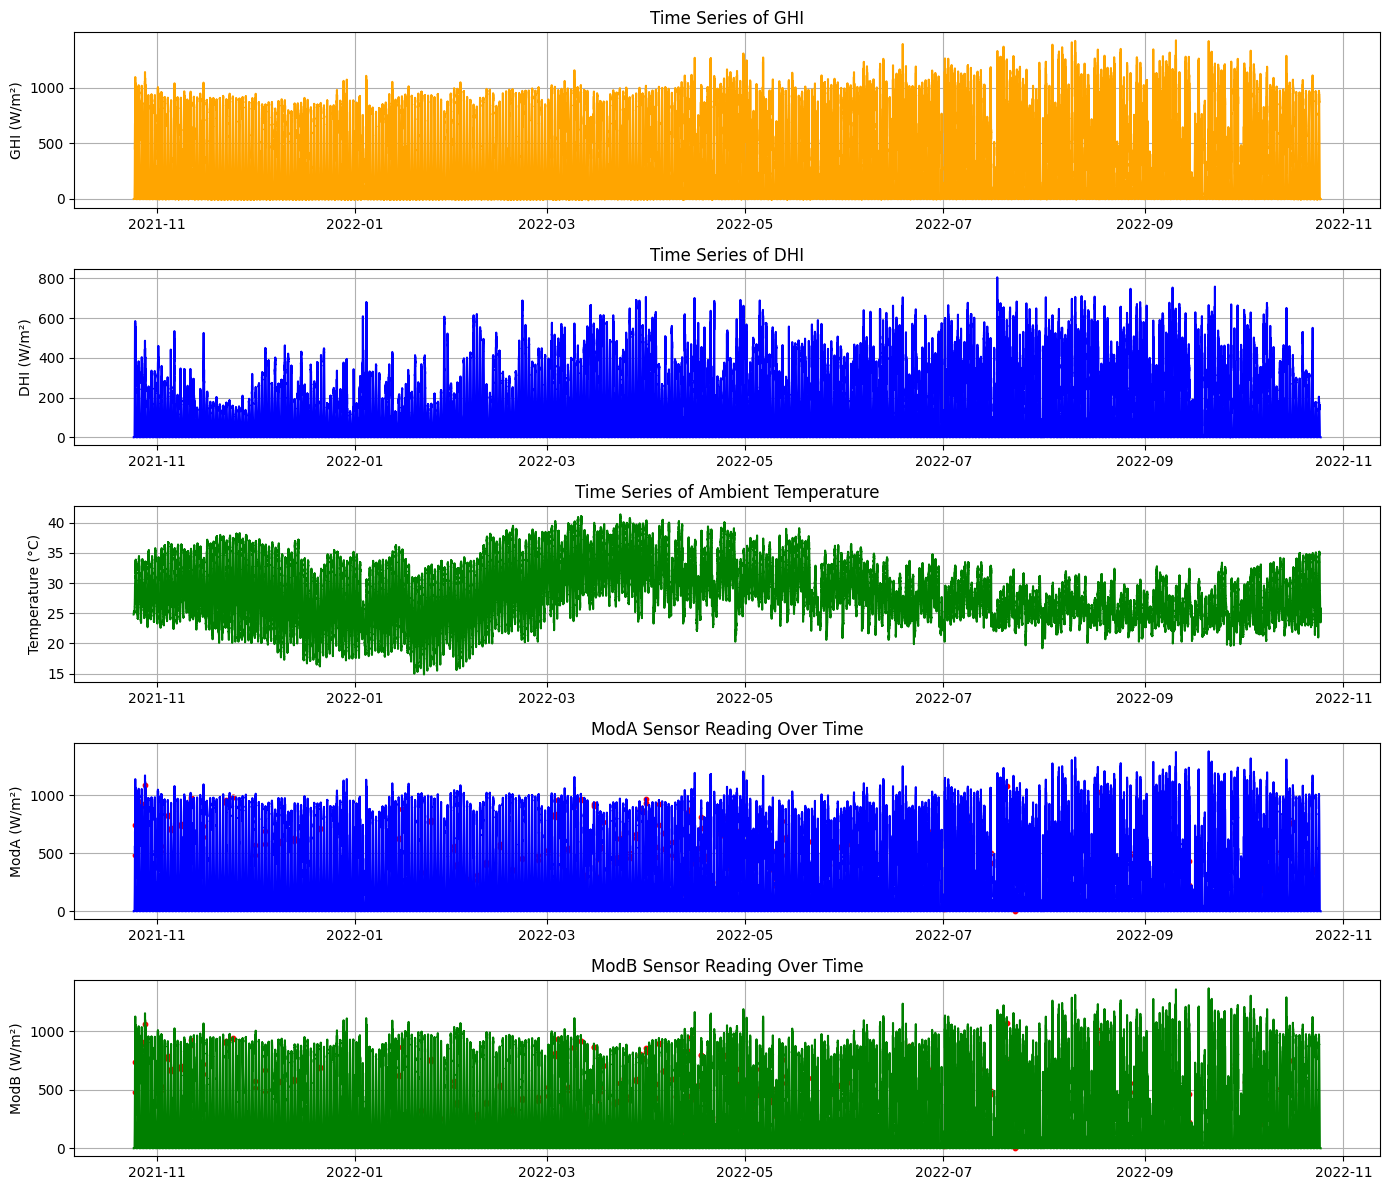

Mean sensor readings before cleaning:
ModA    225.979064
ModB    219.401351
dtype: float64

Mean sensor readings after cleaning:
ModA    535.186477
ModB    532.211744
dtype: float64

T-test for ModA: t-statistic = -16.33, p-value = 0.0000
T-test for ModB: t-statistic = -17.03, p-value = 0.0000


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind



# Adjusting the subplot layout to 5 rows
plt.figure(figsize=(14, 12))

# Plot GHI
plt.subplot(5, 1, 1)
plt.plot(csv_data.index, csv_data['GHI'], label='GHI (Global Horizontal Irradiance)', color='orange')
plt.title('Time Series of GHI')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Plot DHI
plt.subplot(5, 1, 2)
plt.plot(csv_data.index, csv_data['DHI'], label='DHI (Diffuse Horizontal Irradiance)', color='blue')
plt.title('Time Series of DHI')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Plot Tamb
plt.subplot(5, 1, 3)
plt.plot(csv_data.index, csv_data['Tamb'], label='Ambient Temperature', color='green')
plt.title('Time Series of Ambient Temperature')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Plot ModA with cleaning events
plt.subplot(5, 1, 4)
plt.plot(csv_data.index, csv_data['ModA'], label='ModA', color='blue')
plt.scatter(csv_data.index[csv_data['Cleaning'] == 1], csv_data['ModA'][csv_data['Cleaning'] == 1], color='red', label='Cleaning Event', s=10)
plt.title('ModA Sensor Reading Over Time')
plt.ylabel('ModA (W/m²)')
plt.grid(True)

# Plot ModB with cleaning events
plt.subplot(5, 1, 5)
plt.plot(csv_data.index, csv_data['ModB'], label='ModB', color='green')
plt.scatter(csv_data.index[csv_data['Cleaning'] == 1], csv_data['ModB'][csv_data['Cleaning'] == 1], color='red', label='Cleaning Event', s=10)
plt.title('ModB Sensor Reading Over Time')
plt.ylabel('ModB (W/m²)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistical comparison before and after cleaning
before_cleaning = csv_data[csv_data['Cleaning'] == 0]
after_cleaning = csv_data[csv_data['Cleaning'] == 1]

# Calculate means
mean_before = before_cleaning[['ModA', 'ModB']].mean()
mean_after = after_cleaning[['ModA', 'ModB']].mean()

print("Mean sensor readings before cleaning:")
print(mean_before)

print("\nMean sensor readings after cleaning:")
print(mean_after)

# Optionally, you could perform t-tests or other statistical tests to evaluate significance
t_stat_modA, p_val_modA = ttest_ind(before_cleaning['ModA'], after_cleaning['ModA'], nan_policy='omit')
t_stat_modB, p_val_modB = ttest_ind(before_cleaning['ModB'], after_cleaning['ModB'], nan_policy='omit')

print(f"\nT-test for ModA: t-statistic = {t_stat_modA:.2f}, p-value = {p_val_modA:.4f}")
print(f"T-test for ModB: t-statistic = {t_stat_modB:.2f}, p-value = {p_val_modB:.4f}")


### Correlation Analysis

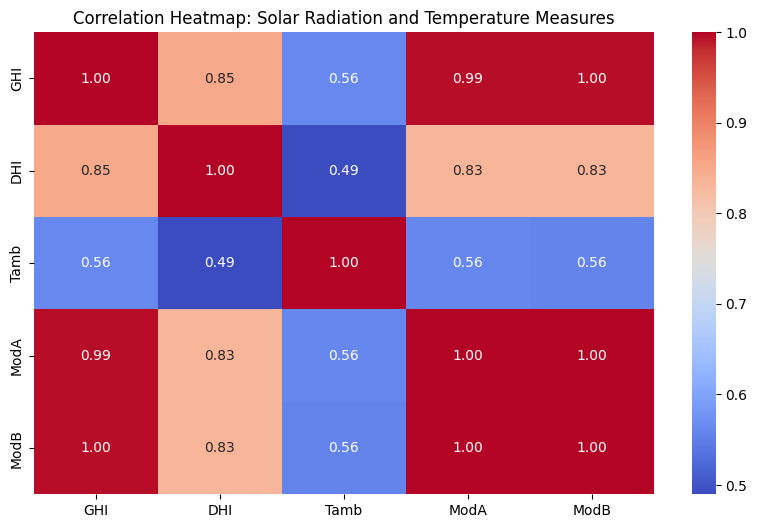

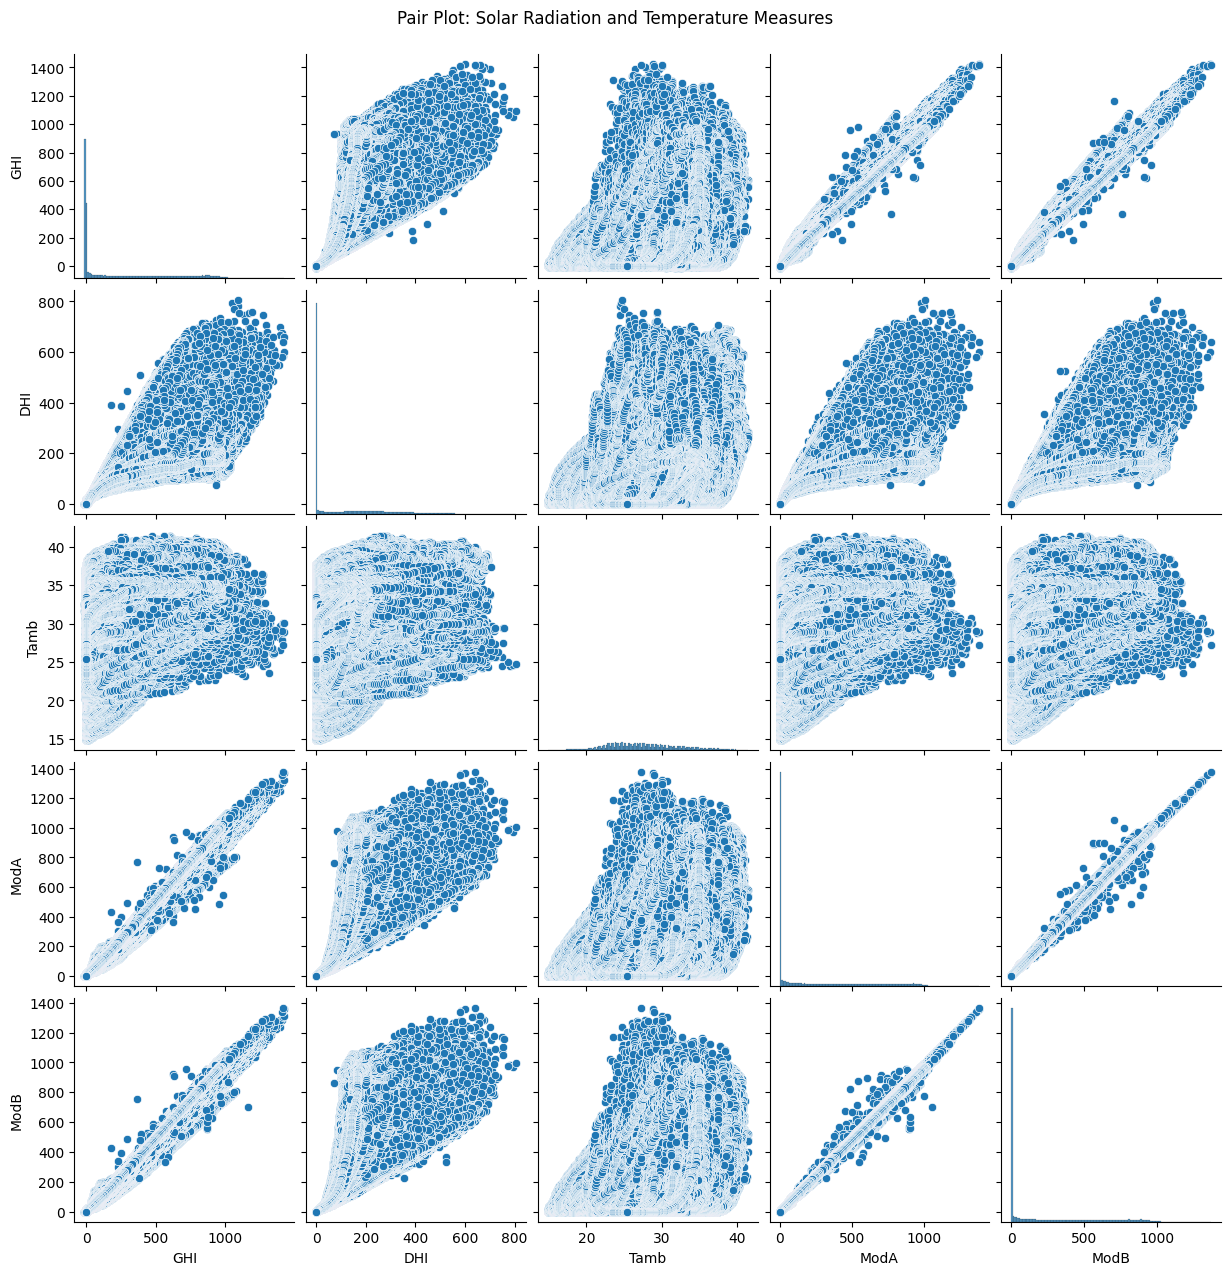

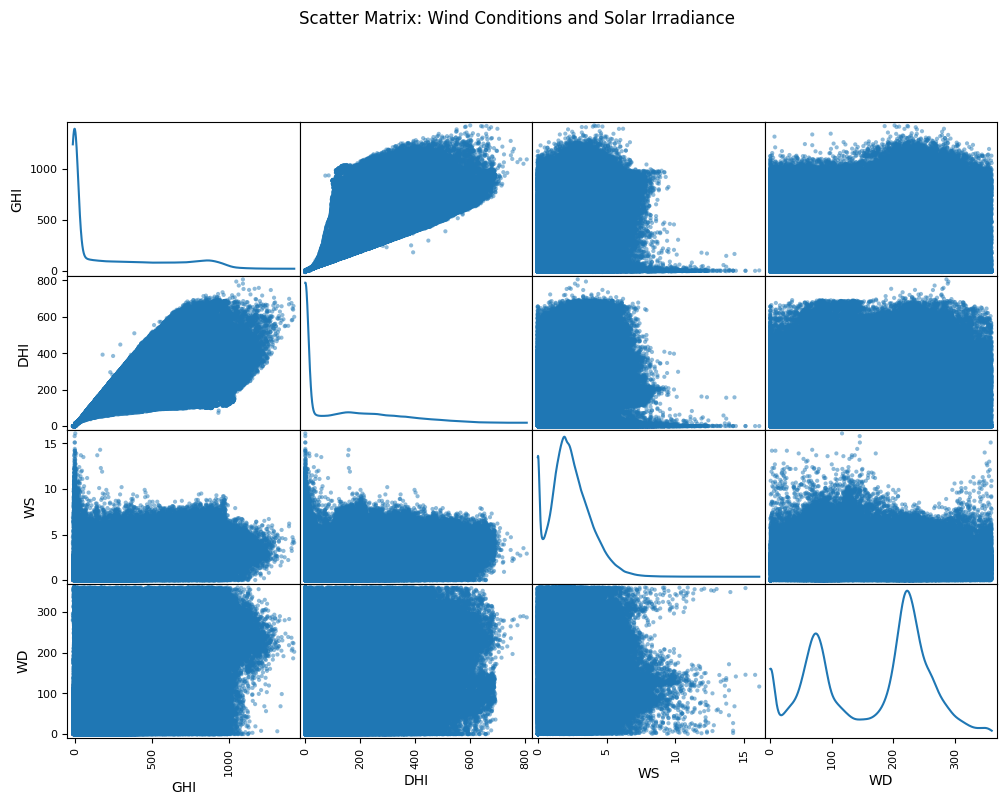

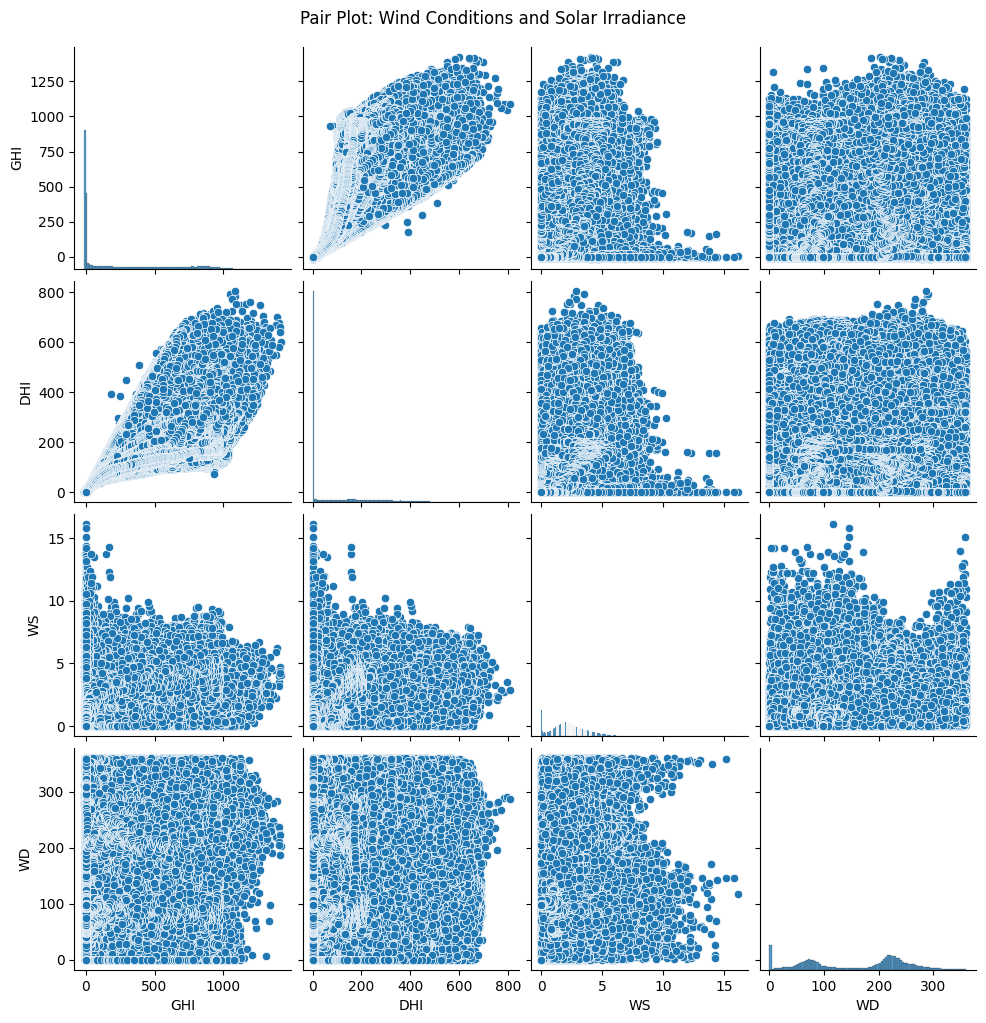

In [7]:
# Calculate the correlation matrix for solar radiation and temperature measures
corr_matrix = csv_data[['GHI', 'DHI', 'Tamb', 'ModA', 'ModB']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Solar Radiation and Temperature Measures')
plt.show()

# Pair plot to visualize pairwise relationships
sns.pairplot(csv_data[['GHI', 'DHI', 'Tamb', 'ModA', 'ModB']])
plt.suptitle('Pair Plot: Solar Radiation and Temperature Measures', y=1.02)
plt.show()

# Investigate relationship between wind conditions and solar irradiance using scatter plots
scatter_data = csv_data[['GHI', 'DHI', 'WS', 'WD']]
scatter_matrix(scatter_data, figsize=(12, 8), diagonal='kde')
plt.suptitle('Scatter Matrix: Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

# Alternatively, using Seaborn pairplot for wind conditions and solar irradiance
sns.pairplot(csv_data[['GHI', 'DHI', 'WS', 'WD']])
plt.suptitle('Pair Plot: Wind Conditions and Solar Irradiance', y=1.02)
plt.show()



### Wind Analysis

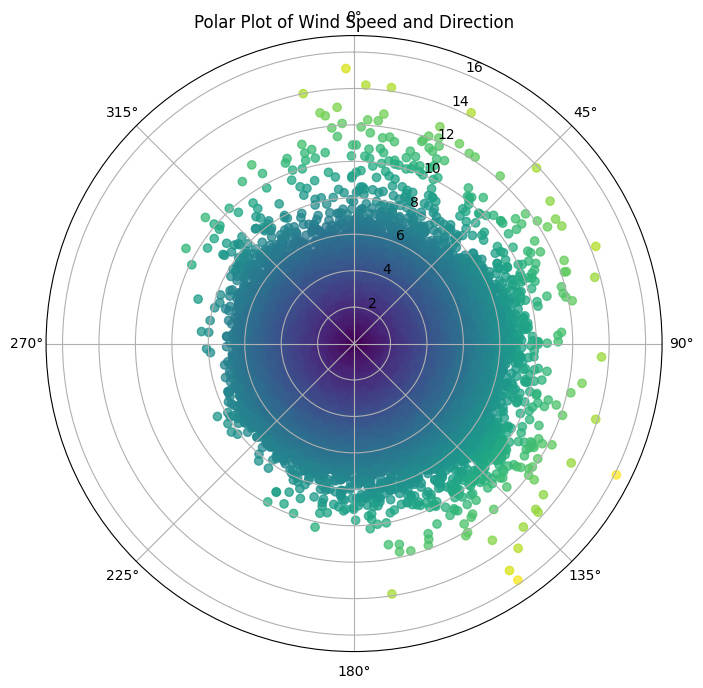

In [8]:

# Convert wind direction from degrees to radians
csv_data['WD_rad'] = np.deg2rad(csv_data['WD'])

# Plot wind direction and speed in a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(csv_data['WD_rad'], csv_data['WS'], c=csv_data['WS'], cmap='viridis', alpha=0.75)
ax.set_theta_zero_location('N')  # Set 0 degrees to point north
ax.set_theta_direction(-1)  # Set the direction of increasing angles to clockwise
ax.set_title('Polar Plot of Wind Speed and Direction')
plt.show()



### Temperature Analysis

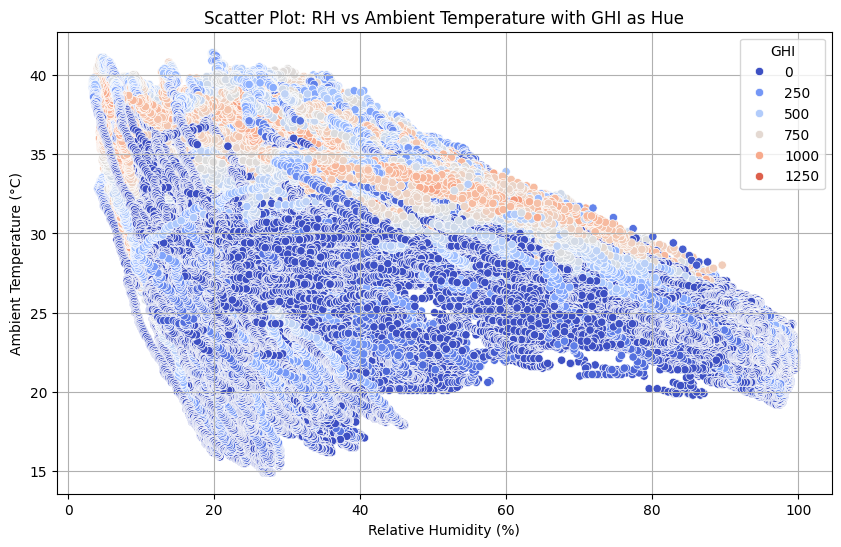

d:\projects\AI\moonlight-data-analysis-and-dashboard-dev\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


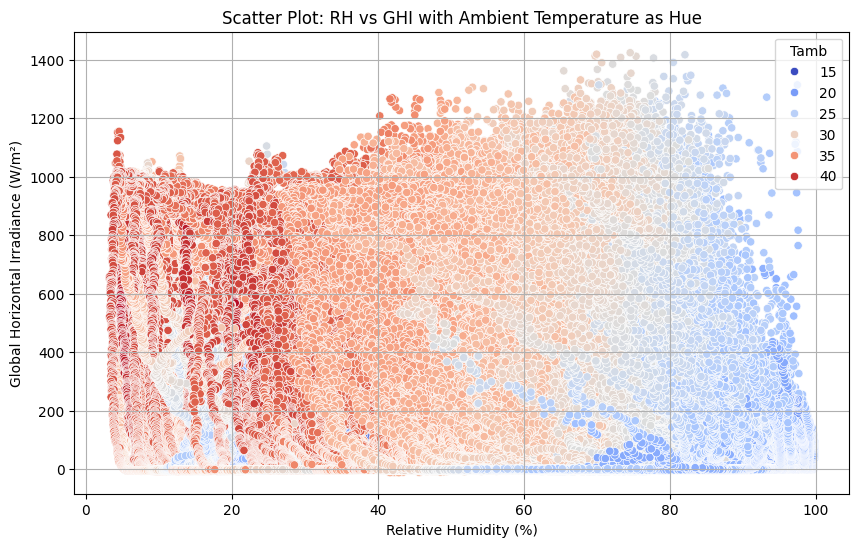

In [9]:
# Scatter plot to examine RH influence on Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='Tamb', data=csv_data, hue='GHI', palette='coolwarm')
plt.title('Scatter Plot: RH vs Ambient Temperature with GHI as Hue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.show()

# Scatter plot to examine RH influence on Solar Radiation (GHI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='GHI', data=csv_data, hue='Tamb', palette='coolwarm')
plt.title('Scatter Plot: RH vs GHI with Ambient Temperature as Hue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.grid(True)
plt.show()


### Histograms

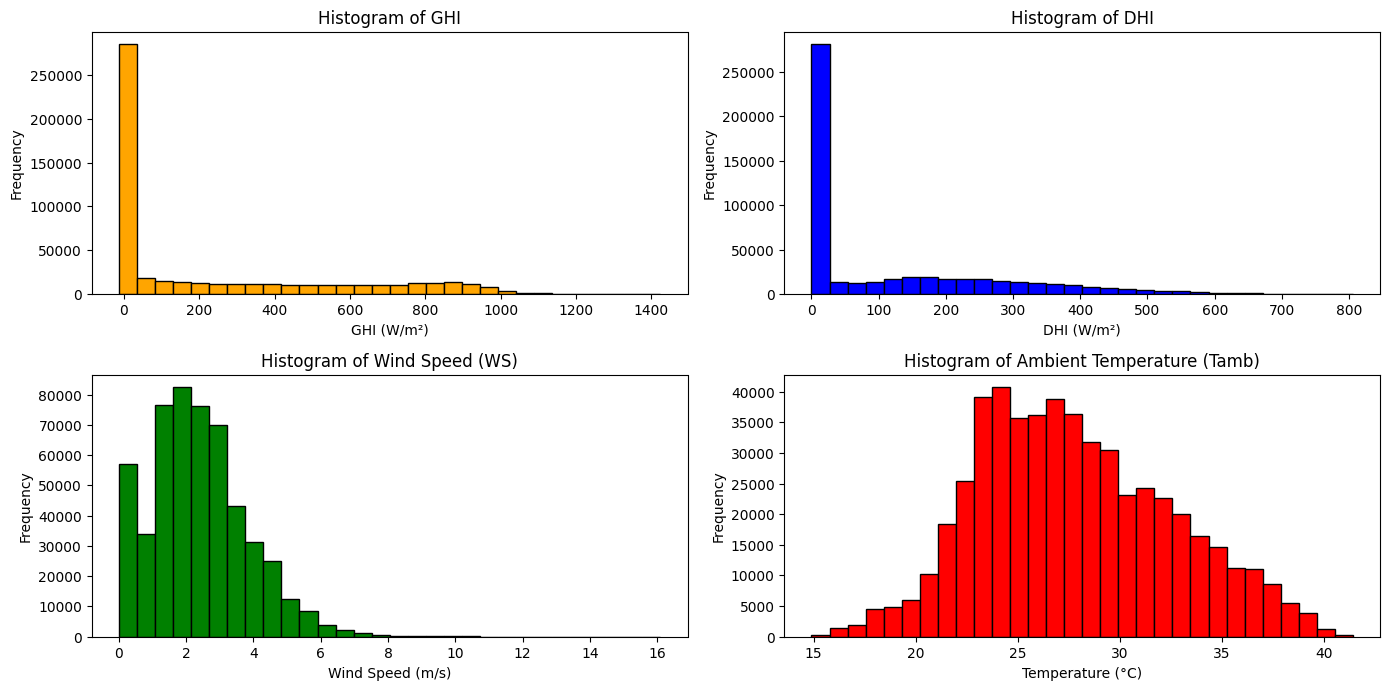

In [10]:
# Histogram for GHI, DHI, and WS
plt.figure(figsize=(14, 10))

# GHI Histogram
plt.subplot(3, 2, 1)
plt.hist(csv_data['GHI'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# DHI Histogram
plt.subplot(3, 2, 2)
plt.hist(csv_data['DHI'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# WS Histogram
plt.subplot(3, 2, 3)
plt.hist(csv_data['WS'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

# Tamb Histogram
plt.subplot(3, 2, 4)
plt.hist(csv_data['Tamb'], bins=30, color='red', edgecolor='black')
plt.title('Histogram of Ambient Temperature (Tamb)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Z-Score Analysis:

Number of outliers detected per variable:
GHI      305
DHI     3415
Tamb       0
ModA     137
ModB     206
WS      3510
dtype: int64


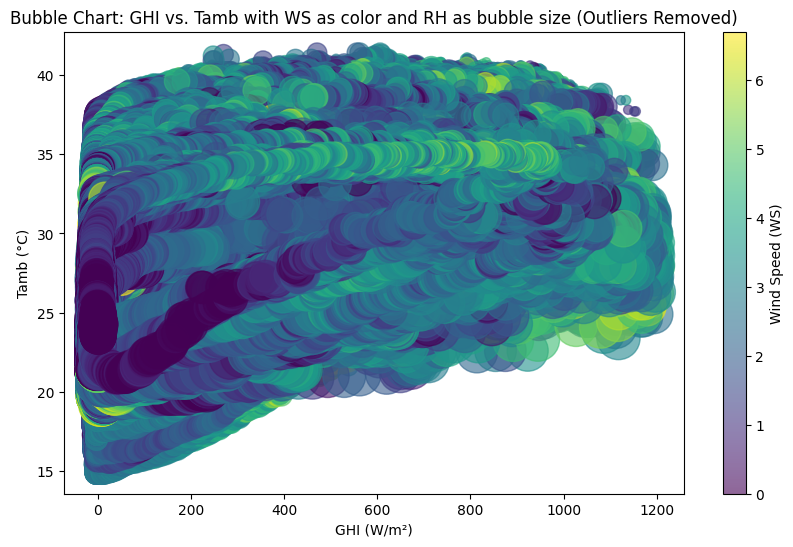

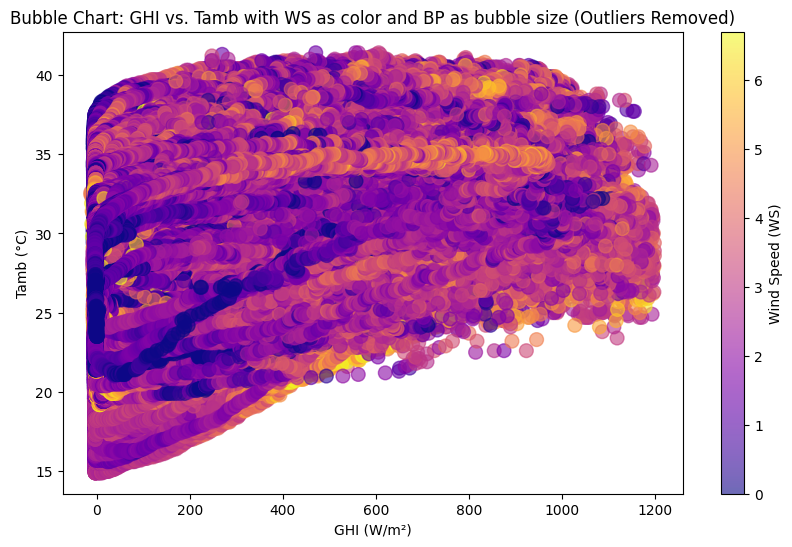

'comments' column not found. Skipping check for missing values in comments.
Data cleaning completed. Cleaned dataset (with outliers removed) saved.


In [11]:
### 1. Z-Score Analysis and Outlier Removal ###
# Calculate Z-scores for relevant columns (e.g., GHI, DHI, Tamb)
z_scores = csv_data[['GHI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS']].apply(zscore)

# Flag data points that are significantly different from the mean (e.g., |Z| > 3)
outliers = (z_scores.abs() > 3).sum()
print("Number of outliers detected per variable:")
print(outliers)

# Remove outliers based on the combined Z-scores of all relevant columns
data_no_outliers = csv_data[(z_scores.abs() <= 3).all(axis=1)]

### 2. Bubble Chart Visualization ###
# Bubble chart: GHI vs. Tamb vs. WS with bubble size representing RH (Relative Humidity)
plt.figure(figsize=(10, 6))
plt.scatter(data_no_outliers['GHI'], data_no_outliers['Tamb'], s=data_no_outliers['RH']*10, c=data_no_outliers['WS'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Wind Speed (WS)')
plt.title('Bubble Chart: GHI vs. Tamb with WS as color and RH as bubble size (Outliers Removed)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.show()

# Bubble chart: GHI vs. Tamb vs. WS with bubble size representing BP (Barometric Pressure)
plt.figure(figsize=(10, 6))
plt.scatter(data_no_outliers['GHI'], data_no_outliers['Tamb'], s=data_no_outliers['BP']*0.1, c=data_no_outliers['WS'], cmap='plasma', alpha=0.6)
plt.colorbar(label='Wind Speed (WS)')
plt.title('Bubble Chart: GHI vs. Tamb with WS as color and BP as bubble size (Outliers Removed)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.show()

### 3. csv_data Cleaning - Handling Missing Values and Comments ###

# Check for missing values (excluding 'comments' if it doesn't exist)
try:
  missing_values = csv_data.drop('comments', axis=1).isnull().sum()
  print("Missing values per column (excluding comments):")
  print(missing_values)
except KeyError:
  print("'comments' column not found. Skipping check for missing values in comments.")

# Drop columns with excessive missing values (excluding 'comments')
data_cleaned = csv_data.drop(columns=[col for col in missing_values.index if missing_values[col] > (len(csv_data) * 0.5)])  # Threshold: 50% missing values

# Optionally, fill missing values for certain columns (excluding 'comments')
data_cleaned.fillna(data_cleaned.mean(), inplace=True)  # Fill remaining missing values with mean

# You can also drop rows with missing data if appropriate
# data_cleaned.dropna(inplace=True)  # Uncomment if you want to drop rows with missing values

# Save the cleaned data with outliers removed
data_cleaned.to_csv('../data/Togo_solar_measurements_cleaned.csv')

print("Data cleaning completed. Cleaned dataset (with outliers removed) saved.")
